# loan will be repaid or not 

     the model predicts whether the loan will repaid by the loan taker or not 
               
               
                will return loan represented by 0
                will not be repaid represented by 1
                
                
                
                
     code very usefull for finance agents and used in banks

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loan=pd.read_csv("DATASETS/loan_data.csv")
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
target=loan["not.fully.paid"]
#converts categorical purpose into dummy varibale 
data=pd.get_dummies(loan,drop_first=True).drop("not.fully.paid",axis=1)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


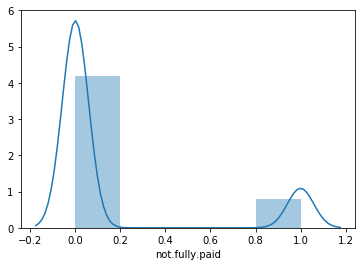

In [4]:
sns.distplot(target,bins=5)   #categorical plot showing if the oan paid or not 0 means paid 1 means not paid

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.2,random_state=42)

In [6]:
xtest.shape

(1916, 18)

In [7]:
clf=RandomForestClassifier(criterion="gini",n_estimators=30)

In [8]:
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)
print("predicted value:",pred[:20])
print("known value    :",ytest[:20])
print("accuracy score :",accuracy_score(pred,ytest))

predicted value: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
known value    : 8558    0
4629    0
1383    1
8142    0
1768    0
7583    0
6000    0
6978    0
9506    0
6560    0
6310    1
7530    0
5454    0
3079    0
7755    0
2603    1
3399    0
5518    0
3206    0
5196    0
Name: not.fully.paid, dtype: int64
accuracy score : 0.8366388308977035


In [9]:
print(confusion_matrix(ytest,pred),"\n")
#the model performs good for class 0 but not that good for class 1
print(classification_report(ytest,pred),"\n")
#classification report gives report of the model for each class

[[1595   16]
 [ 297    8]] 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.33      0.03      0.05       305

   micro avg       0.84      0.84      0.84      1916
   macro avg       0.59      0.51      0.48      1916
weighted avg       0.76      0.84      0.77      1916
 

